In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
path='Admission_Predict.csv'
path_1='Admission_Predict_Ver1.1.csv'

In [3]:
df=pd.read_csv(path)

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [6]:
df=pd.read_csv(path_1)

In [7]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [9]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

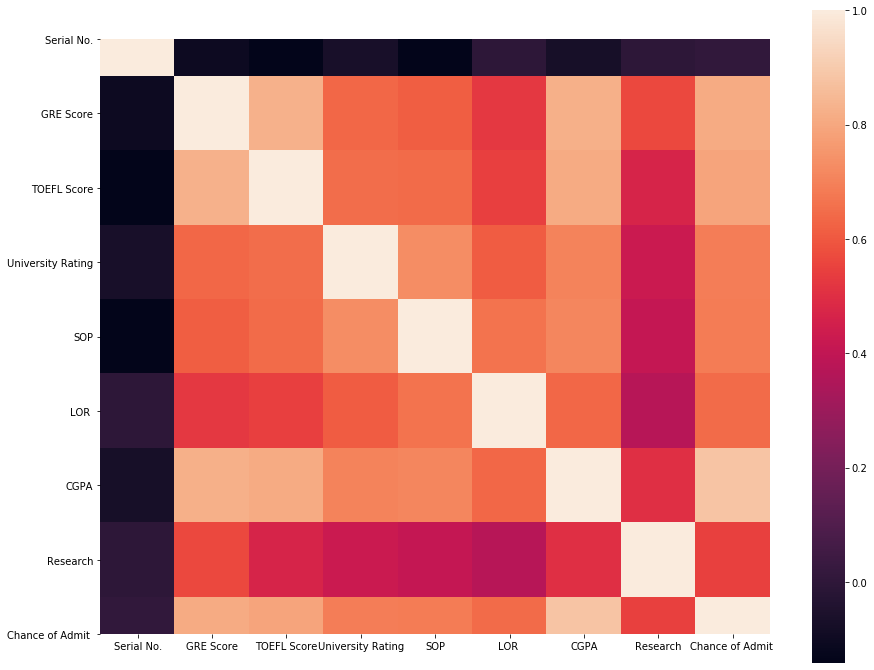

In [10]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, square=True);

/home/lirus/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


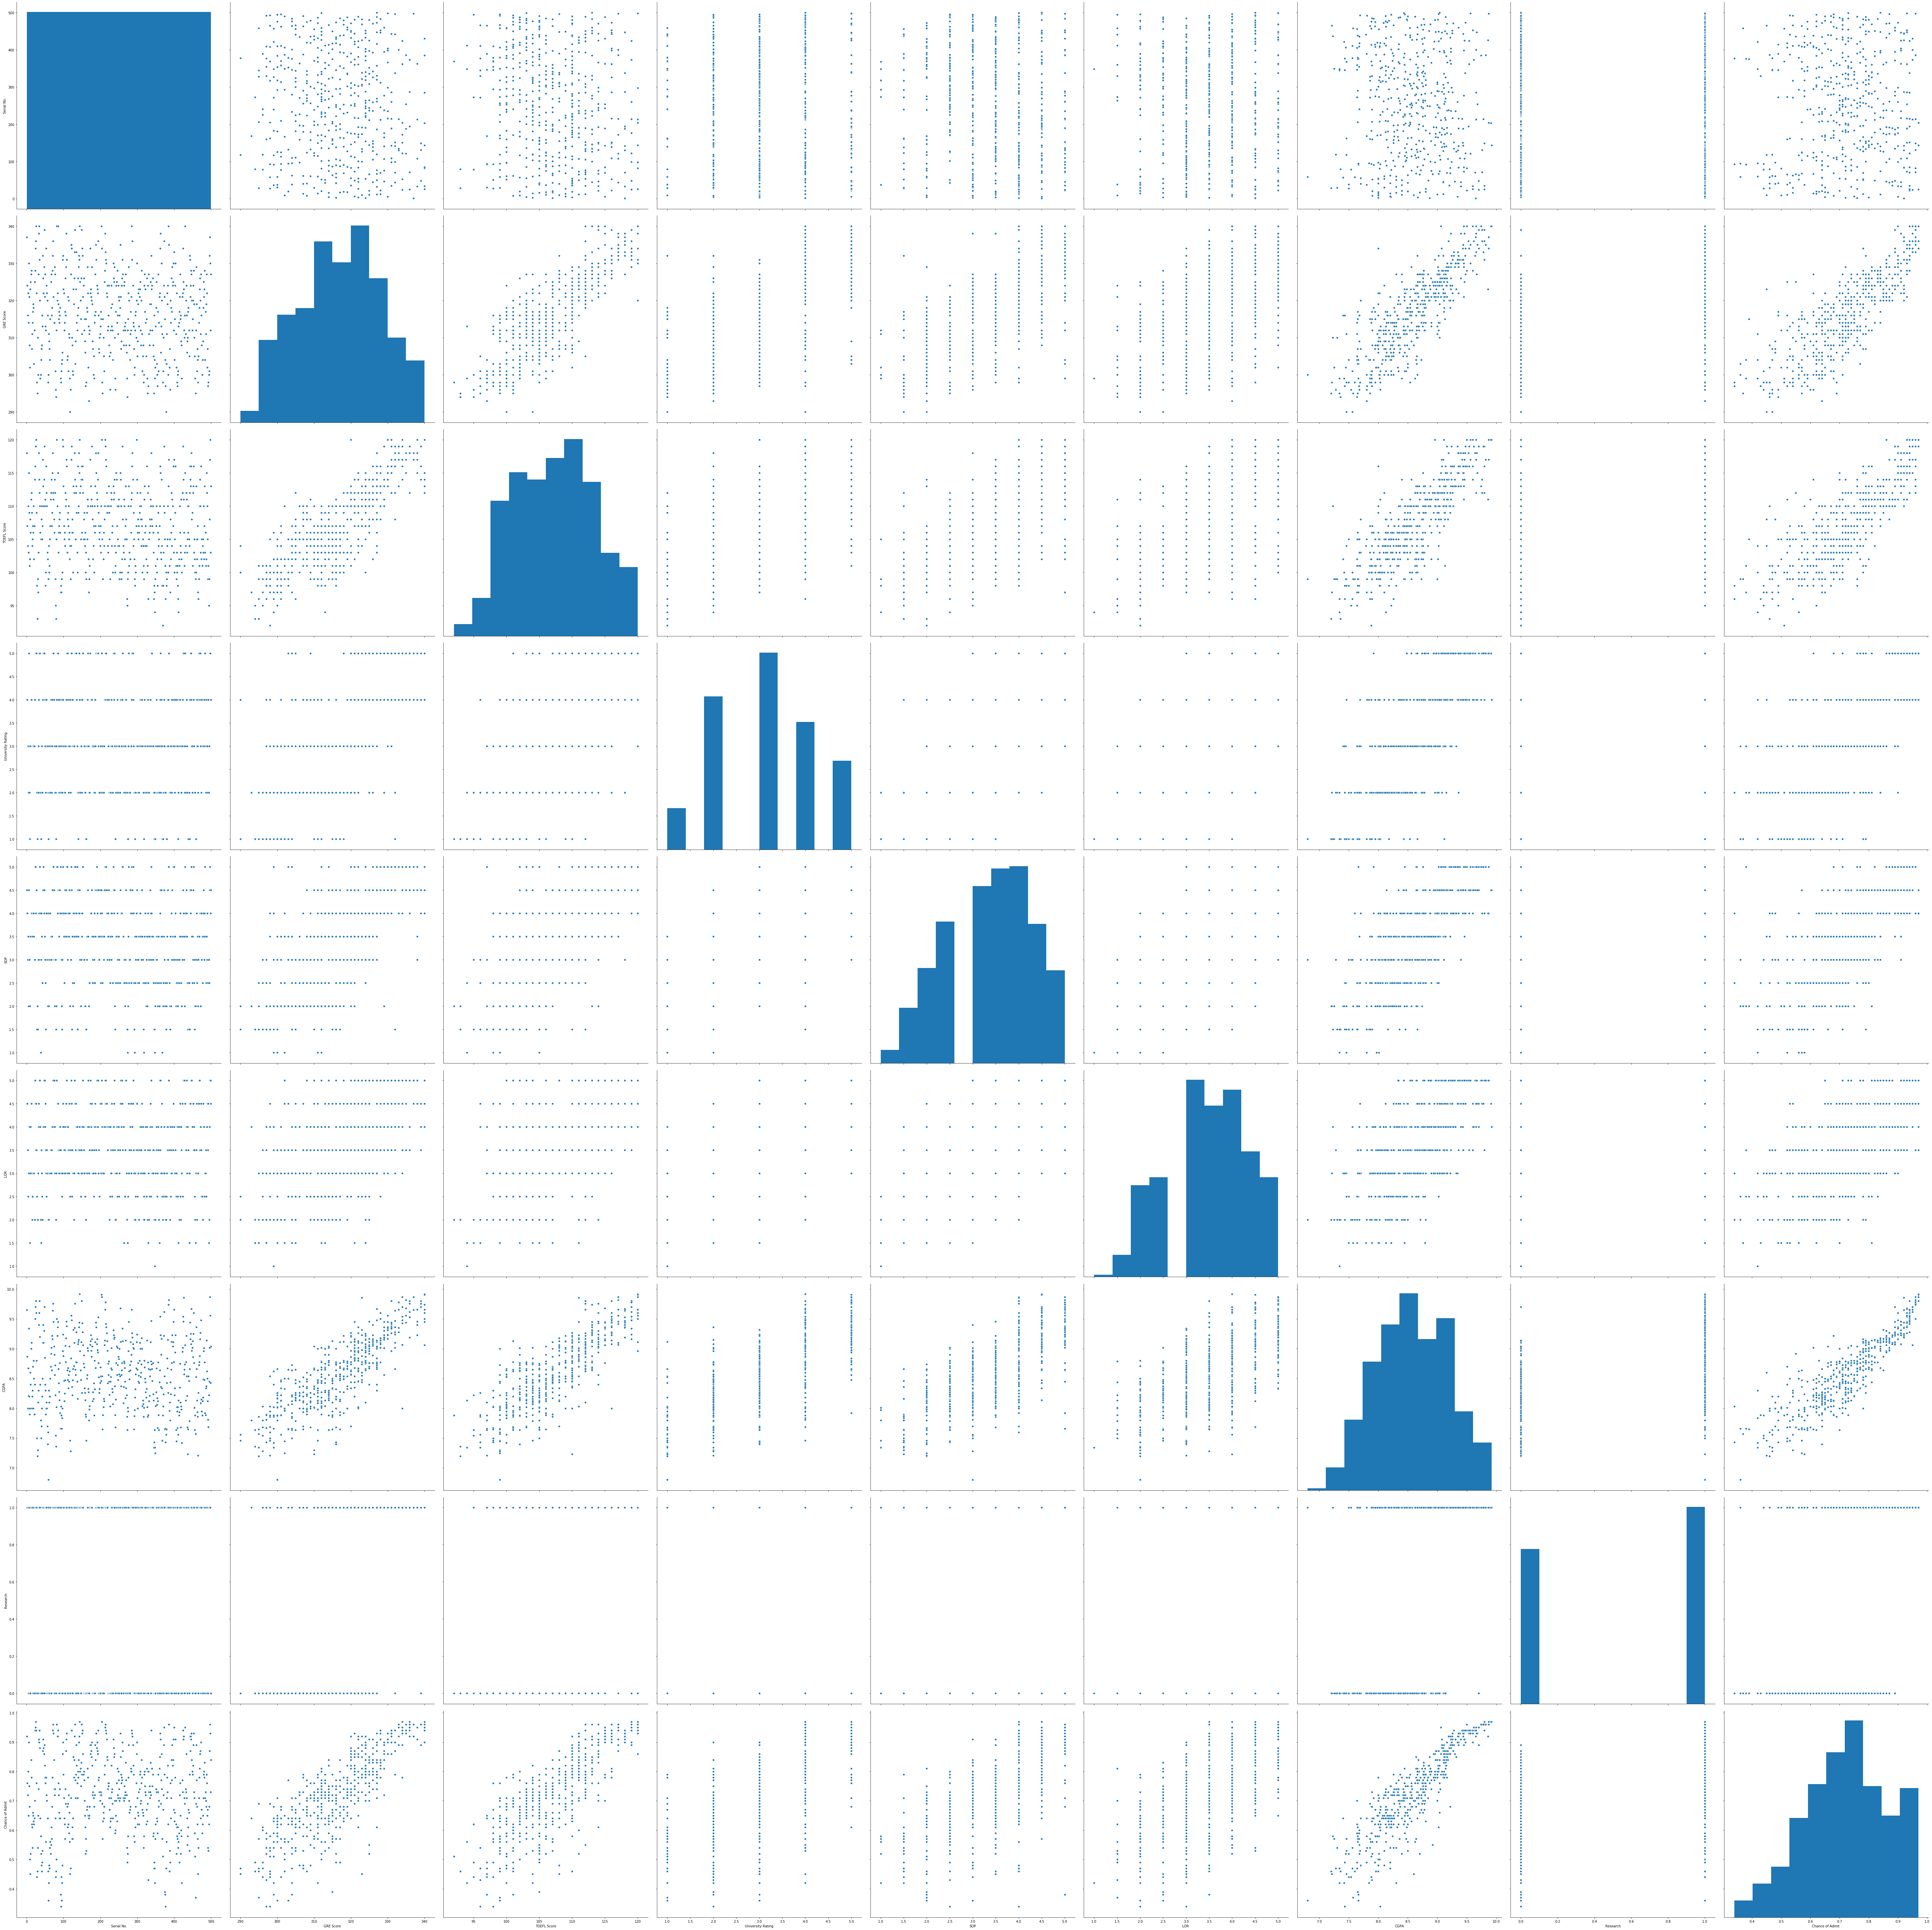

In [11]:
cols = df.columns
sns.pairplot(df[cols], size = 9);

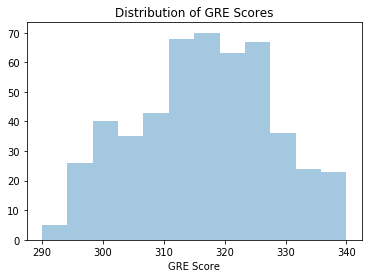

In [12]:
fig = sns.distplot(df['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

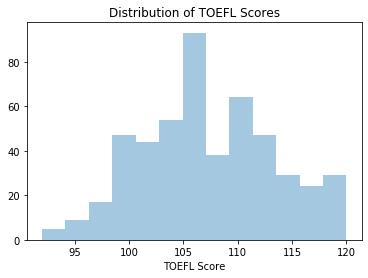

In [13]:
fig = sns.distplot(df['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

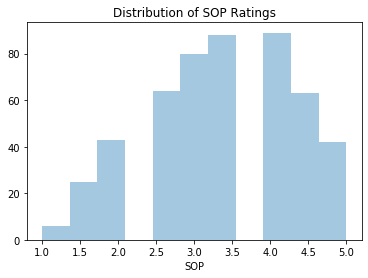

In [14]:
fig = sns.distplot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

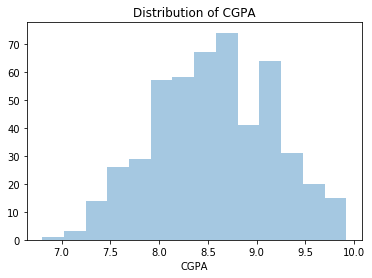

In [15]:
fig = sns.distplot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

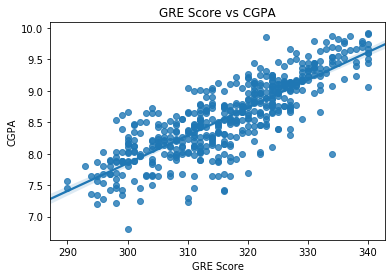

In [16]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

In [17]:
df = df.drop(['Serial No.'], axis=1)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,LabelEncoder

X = df.drop(['Chance of Admit '], axis=1)
Y = df['Chance of Admit ']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, shuffle=True)

X_train=preprocessing.scale(X_train)
X_test=preprocessing.scale(X_test)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(450, 7) (50, 7) (450,) (50,)


In [36]:
from sklearn import linear_model
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


models=  [['Linear_Regression:',linear_model.LinearRegression()],
           ['Ridge Regression :',linear_model.Ridge(alpha=.5)],
           ['Lasso Regression :', linear_model.Lasso(alpha=0.1)],
           ['Bayesian Ridge:', linear_model.BayesianRidge()],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
         ]

In [37]:
for n,m in models:
    model=m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('{} R2_Score:{} RMSE:{} MAE:{}'.format(n, model.score(X_test,Y_test), mean_squared_error(Y_test, y_pred), mean_absolute_error(Y_test, y_pred)))

Linear_Regression: R2_Score:0.8065597143983732 RMSE:0.005173490799912692 MAE:0.04914276925943319
Ridge Regression : R2_Score:0.8065499952723648 RMSE:0.005173750734438896 MAE:0.049167578186935984
Lasso Regression : R2_Score:0.2177301086438873 RMSE:0.020921526627158345 MAE:0.1216061884424959
Bayesian Ridge: R2_Score:0.8064524171977546 RMSE:0.005176360424916244 MAE:0.049333700653065735
AdaBoostClassifier : R2_Score:0.769716451127165 RMSE:0.006158850612526376 MAE:0.06000718848735112
GradientBoostingClassifier:  R2_Score:0.7749170435200146 RMSE:0.006019762641192878 MAE:0.053705142165410544


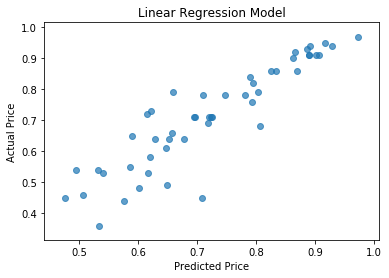

In [38]:
plt.scatter(models[0][1].predict(X_test), Y_test, alpha=.7) 
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

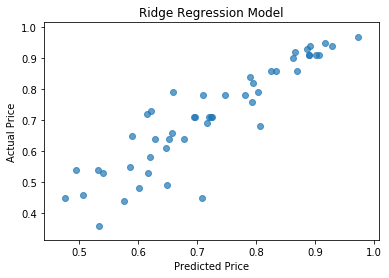

In [39]:
plt.scatter(models[1][1].predict(X_test), Y_test, alpha=.7)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Ridge Regression Model')
plt.show()